In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from xgboost import XGBClassifier

In [3]:
data = pd.read_csv("csv/walk.csv",index_col=False)
data = data.loc[data['id'].isin([1,2,5])]
# X = data[["r_hip_ang", "r_knee_ang", "r_ankle_ang", "r_elbow_ang", "r_shoulder_ang",]]
        # "r_hip_vel", "r_knee_vel", "r_ankle_vel", "r_elbow_vel", "r_shoulder_vel",
        # "r_hip_accel", "r_knee_accel", "r_ankle_accel", "r_elbow_accel", "r_shoulder_accel"]]
X = data.drop(["id","gender","age"], axis=1)

encode = {'male': 0, 'female': 1}
# encode = {'<40': 0, '>40': 1}
y = data['gender'].map(encode)
X  = preprocessing.scale(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
data = pd.read_csv("csv/walk.csv",index_col=False)
encode = {'<40': 0, '>40': 1}
# encode = {'male': 0, 'female': 1}

X = data.loc[data['id'].isin([2,3,4,5,6,7])]
# X_train = X [["r_hip_ang", "r_knee_ang", "r_ankle_ang", "r_elbow_ang", "r_shoulder_ang"]]
#         "r_hip_vel", "r_knee_vel", "r_ankle_vel", "r_elbow_vel", "r_shoulder_vel",
#         "r_hip_accel", "r_knee_accel", "r_ankle_accel", "r_elbow_accel", "r_shoulder_accel"]]
X_train = X.drop(['id','gender','age'],axis=1) #,'r_shoulder_ang','r_elbow_ang','r_knee_vel_3','r_elbow_vel_3','r_shoulder_vel_3'],axis=1)
X_train = preprocessing.scale(X_train)
y_train = X['age'].map(encode)

X2 = data.loc[data['id'].isin([1,10])] 
# X_test = X2 [["r_hip_ang", "r_knee_ang", "r_ankle_ang", "r_elbow_ang", "r_shoulder_ang"]]
        # "r_hip_vel", "r_knee_vel", "r_ankle_vel", "r_elbow_vel", "r_shoulder_vel",
        # "r_hip_accel", "r_knee_accel", "r_ankle_accel", "r_elbow_accel", "r_shoulder_accel"]]
X_test = X2.drop(['id','gender','age'],axis=1) #,'r_shoulder_ang','r_elbow_ang','r_knee_vel_3','r_elbow_vel_3','r_shoulder_vel_3'],axis=1)
X_test = preprocessing.scale(X_test)
y_test = X2['age'].map(encode)

In [27]:
# MULTILABEL
data = pd.read_csv("csv/walk.csv",index_col=False)
data = data.loc[data['id'].isin([2,3,4,5,6,7])]
# X = data[["r_hip_ang", "r_knee_ang", "r_ankle_ang", "r_elbow_ang", "r_shoulder_ang",]]
        # "r_hip_vel", "r_knee_vel", "r_ankle_vel", "r_elbow_vel", "r_shoulder_vel",
        # "r_hip_accel", "r_knee_accel", "r_ankle_accel", "r_elbow_accel", "r_shoulder_accel"]]
# X = data.drop(["id","gender","age"], axis=1)

# encode = {'male': 0, 'female': 1}
encode = {'<40': 0, '>40': 1, 'male': 0, 'female': 1}
# y = data['age', 'gender'].map(encode)
#X  = preprocessing.scale(X)

data.age = data.age.map(encode)
data.gender = data.gender.map(encode)

train, test = train_test_split(data, test_size = 0.20)


X_train = train.drop(["id","gender","age"], axis=1)
X_train = preprocessing.scale(X_train)
X_test = test.drop(["id","gender","age"], axis=1)
X_test = preprocessing.scale(X_test)

# print(train)

categories = ['gender', 'age']

       id  frame   r_hip_ang  r_knee_ang  r_ankle_ang  r_elbow_ang  \
61998   3    128  177.842231  179.809770   113.725480   162.389923   
64953   3    106  173.757792  173.483287   103.551390   152.675672   
90836   5     99  178.899416  170.546518   105.764316   152.313270   
71089   4     98  178.615376  151.998790    91.684684   145.324388   
62135   3    110  172.461769  171.396979   116.605236   155.095231   
...    ..    ...         ...         ...          ...          ...   
44179   2     59  168.448765  146.123302   105.708638   162.290187   
72588   4     82  157.933313  127.843246   107.813751   174.087725   
73858   4     90  157.833515  140.099626    96.009006   174.570024   
64599   3     22  178.313409  168.416650   111.561465   145.009598   
62546   3     15  176.096688  169.446557   112.361894   131.709899   

       r_shoulder_ang  gender  age  r_hip_vel  ...  r_hip_accel_2  \
61998       10.348820       0    0   0.456691  ...      -0.005687   
64953       11.339270

In [139]:
# # WITH GENDER
# data = pd.read_csv("csv/walk.csv",index_col=False)
# encodeAge = {'<40': 0, '>40': 1}
# encodeGender = {'male': 0, 'female': 1}
# encode = {'<40': 0, '>40': 1, 'male': 0, 'female': 1}

# X = data.loc[data['id'].isin([2,3,4,5,7,9])]
# X_train = X.drop(['id','age'],axis=1)
# X_train['gender'] = X_train['gender'].map(encodeGender)
# X_train = preprocessing.scale(X_train)
# y_train = X['age'].map(encodeAge)

# X2 = data.loc[data['id'].isin([1,10])] 
# X_test = X2.drop(['id','age'],axis=1)
# X_test['gender'] = X_test['gender'].map(encodeGender)
# X_test = preprocessing.scale(X_test)
# y_test = X2['age'].map(encodeAge)



In [29]:
# MULTILABEL
for category in categories:
    clf = XGBClassifier(
    #BEST for Train: 2,3,4,5,7,9 and Test 1,10 Age
    reg_lambda = 0.5,
    reg_alpha = 0.5,
    n_estimators = 200,
    learning_rate = 0.1,
    gamma = 0,
    booster = 'gbtree',
    base_score = 0.9,
    min_child_weight = 1,
    max_depth = 6,
    subsample = 0.3,
    colsample_bytree = 0.4)

    clf.fit(X_train, train[category])
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(test[category], y_pred))

    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(test[category],y_pred))
    print(classification_report(test[category],y_pred))

Accuracy: 0.9468681452595662
[[5944  321]
 [ 333 5711]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6265
           1       0.95      0.94      0.95      6044

    accuracy                           0.95     12309
   macro avg       0.95      0.95      0.95     12309
weighted avg       0.95      0.95      0.95     12309

Accuracy: 0.9359005605654399
[[4810  448]
 [ 341 6710]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5258
           1       0.94      0.95      0.94      7051

    accuracy                           0.94     12309
   macro avg       0.94      0.93      0.93     12309
weighted avg       0.94      0.94      0.94     12309



In [4]:
clf = XGBClassifier(
# #BEST for Train: 2,3,4,5,7,9 and Test 1,10 Age w/GENDER
#  reg_lambda = 1,
#  reg_alpha = 0.5,
#  n_estimators = 200,
#  learning_rate = 0.1,
#  gamma = 0,
#  booster = 'gbtree',
#  base_score = 0.9,
#  min_child_weight = 1,
#  max_depth = 6,
#  subsample = 0.3,
#  colsample_bytree = 0.5)
#BEST for Train: 2,3,4,5,7,9 and Test 1,10 Age
#  reg_lambda = 0.5,
#  reg_alpha = 0.5,
#  n_estimators = 200,
#  learning_rate = 0.1,
#  gamma = 0,
#  booster = 'gbtree',
#  base_score = 0.9,
#  min_child_weight = 1,
#  max_depth = 6,
#  subsample = 0.3,
#  colsample_bytree = 0.4)
 #BEST for Train 1 2 5, Test 3 4 Gender
#  reg_lambda = 0.5, 
#  reg_alpha = 1,
#  n_estimators = 200,
#  learning_rate = 0.1,
#  gamma = 0,
#  booster = 'gbtree',
#  base_score = 0.5,
#  min_child_weight = 1,
#  max_depth = 6,
#  subsample = 0.5,
#  colsample_bytree = 0.4)
# BEST for tts Gender
 reg_lambda = 5, 
 reg_alpha = 0.5,
 n_estimators = 400, #400
 learning_rate = 0.12,
 gamma = 0.5,
 booster = 'gbtree',
 base_score = 0.5,
 min_child_weight = 6,
 max_depth = 6,
 subsample = 0.5,
 colsample_bytree = 0.9)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [5]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9757935037668273
[[5437   48]
 [ 148 2464]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5485
           1       0.98      0.94      0.96      2612

    accuracy                           0.98      8097
   macro avg       0.98      0.97      0.97      8097
weighted avg       0.98      0.98      0.98      8097



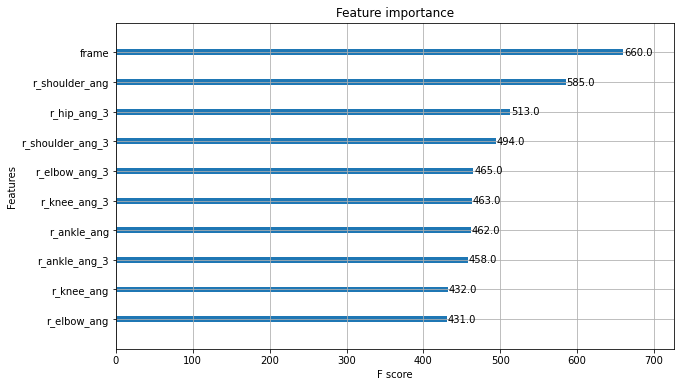

In [11]:
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
pyplot.rcParams["figure.figsize"] = (10, 6)
plot_importance(clf, max_num_features=10).set_yticklabels(['r_elbow_ang', 'r_knee_ang', 'r_ankle_ang_3', 'r_ankle_ang', 'r_knee_ang_3',
    'r_elbow_ang_3', 'r_shoulder_ang_3', 'r_hip_ang_3', 'r_shoulder_ang', 'frame'])
pyplot.show()
# pyplot.savefig('filename.png', dpi=300)

In [9]:
from joblib import Parallel, delayed
import joblib
# Save the model as a pickle in a file
joblib.dump(clf, 'models/xgboost_gender_tts_125.pkl')

['models/xgboost_gender_tts_125.pkl']

In [37]:
# Load the model from the file
xgboost_from_joblib = joblib.load('models/xgboost_age_tts_234567.pkl')
# Use the loaded model to make predictions
xgboost_from_joblib.predict(X_test)
acc = xgboost_from_joblib.score(X_test, y_test)
print(acc)

0.5534043941701109


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 0.9],
    'max_depth': range(1,10,2),
    'min_child_weight': range(1,10,2), 
    'subsample' : [i/10.0 for i in range(5,10)],
    'colsample_bytree' :[i/10.0 for i in range(5,10)]
}

In [103]:
rnd_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param,n_jobs=-1, verbose = 10, n_iter =10)
rnd_search.fit(X_train,y_train)
rnd_search.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.9511637977956019

In [104]:
rnd_search.best_params_

{'subsample': 0.7,
 'reg_lambda': 5,
 'reg_alpha': 0.5,
 'n_estimators': 200,
 'min_child_weight': 9,
 'max_depth': 9,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.5,
 'booster': 'gbtree',
 'base_score': 0.2}